In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from PETsys_analysis_tools  import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisCSVfiles/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# $^{22}$Na source activity
## (and plot source activity vs. time (half-life is 2.6 yr))

In [4]:
d_t0 = date(2021,1,6)
data_today = date(2021,6,23) #data_today = date(2021,7,14)
activity_today = Na22_activity_per_day( data_today )
activity_uC, activity_rate_Hz = activity_today
print ('activity in time of measurement:',activity_uC,'uC' )
dt_months = abs((data_today - d_t0).days)/30
dt_years = float(dt_months)/12.

activity in time of measurement: 8.845229917194121 uC


<AxesSubplot:title={'center':'Source activity vs. time'}, xlabel='Time [months since Jan-1,2021]', ylabel='Source activity [$\\mu C$]'>

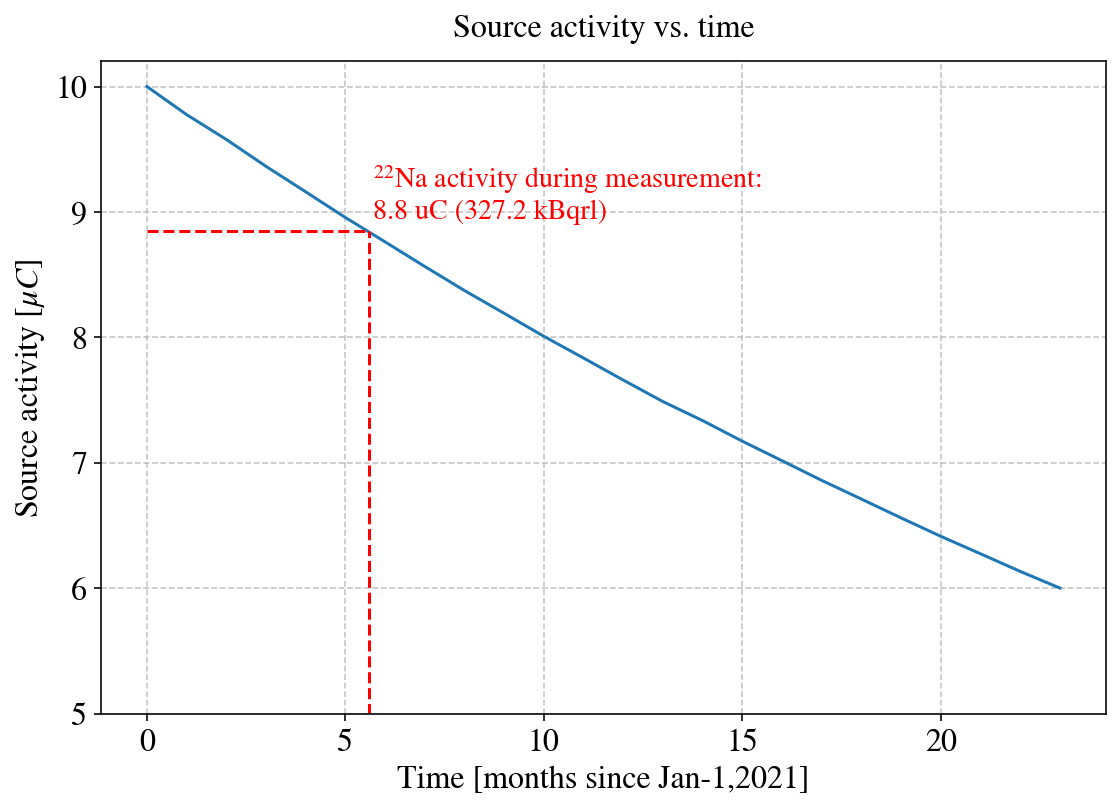

In [6]:
t, Na22_activity = [], []
for month in range(0,24):
    Na22_activity_per_month = Na22_activity_per_day( d_t = date(2021 + int(month/12),
                                                                np.mod(month,12)+1,6) )
    activity_per_month_uC, activity_per_month__Hz = Na22_activity_per_month
    Na22_activity.append(activity_per_month_uC)
    t.append( month )

    
fig=plt.figure(figsize=(9,6))

ax=fig.add_subplot(1,1,1)
ax.plot( (np.array(t)) , Na22_activity, '-');
ax.plot([dt_months,dt_months],[0,activity_uC],'--r' ,
        [0,dt_months],[activity_uC,activity_uC],'--r' )
ax.text( dt_months+0.1, activity_uC+0.1, 
        '$^{22}$Na activity during measurement:\n%.1f uC (%.1f kBqrl)'%(activity_uC,activity_rate_Hz/1e3),
        color='red', fontsize=14)
set_axes(ax,'Time [months since Jan-1,2021]',y_label='Source activity [$\mu C$]',
         fontsize=16,ylim=(5,10.2),
         title='Source activity vs. time',do_add_grid=True,do_add_legend=False)

# $^{252}$Cf source activity

In [80]:
d_t0 = date(2021,7,1)
date_today = date(2021,8,9) 
activity_today = Cf252_activity_per_day( date_today )
Cf252_fissionRateHz_t, Cf252_activity_t, Cf252_eventRateHz_t = activity_today
print (Cf252_fissionRateHz_t, Cf252_activity_t, Cf252_eventRateHz_t)
print ('activity in time of measurement:',Cf252_activity_t,'uC' )
dt_months = abs((date_today - d_t0).days)/30
dt_years = float(dt_months)/12.

5576.029068021419 4.861937603503837 179871.90542004578
activity in time of measurement: 4.861937603503837 uC


<AxesSubplot:title={'center':'Source activity vs. time'}, xlabel='Time [months in 2021]', ylabel='Source activity [$\\mu C$]'>

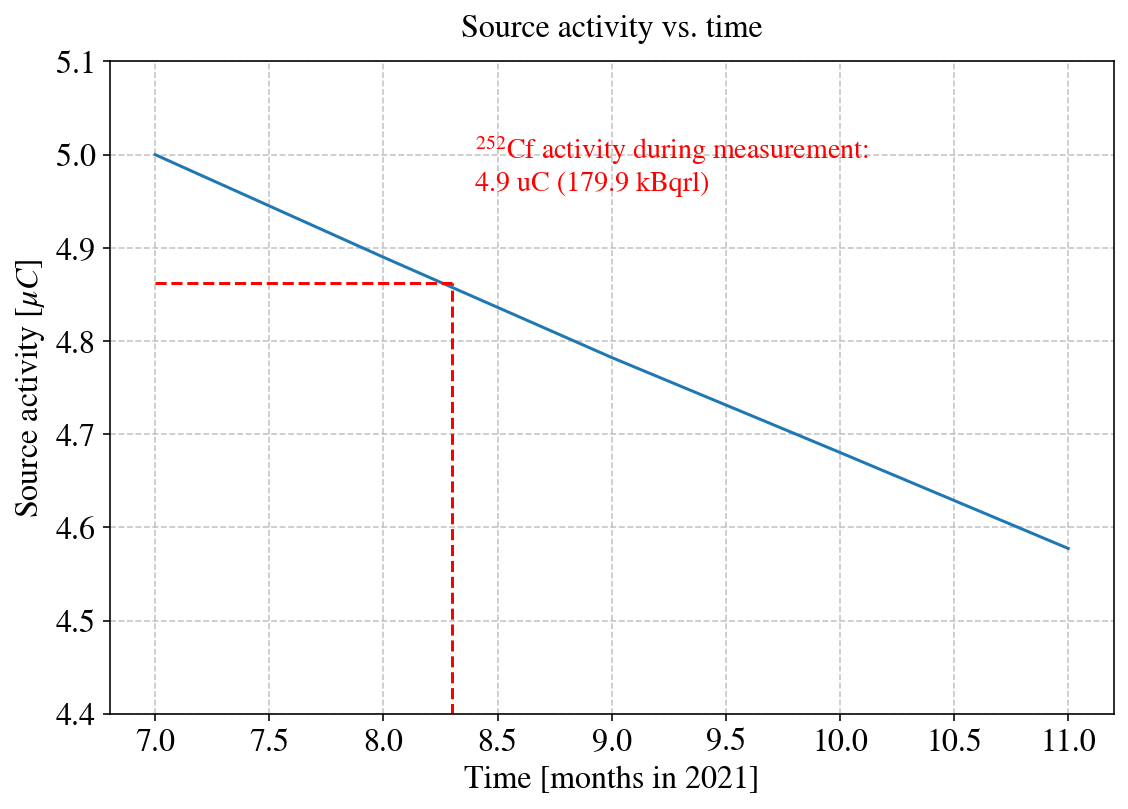

In [90]:
t, Cf252_activity = [], []
for month in range(7,12):
    d_t = date(2021, month , 1)
    Cf252_activity_per_month = Cf252_activity_per_day( d_t = d_t )
    Cf252_fissionRateHz_t, Cf252_activity_per_month, Cf252_eventRateHz_per_month = Cf252_activity_per_month
    Cf252_activity.append(Cf252_activity_per_month)
    t.append( month )


fig=plt.figure(figsize=(9,6))

ax=fig.add_subplot(1,1,1)
ax.plot( (np.array(t)) , Cf252_activity, '-');
ax.plot([dt_months+7,dt_months+7],[0,Cf252_activity_t],'--r' ,
        [7,dt_months+7],[Cf252_activity_t,Cf252_activity_t],'--r' )
ax.text( np.array(dt_months)+7.1, np.array(Cf252_activity_t)+0.1, 
        '$^{252}$Cf activity during measurement:\n%.1f uC (%.1f kBqrl)'%(Cf252_activity_t,Cf252_eventRateHz_t/1e3),
        color='red', fontsize=14)
set_axes(ax,'Time [months in 2021]',y_label='Source activity [$\mu C$]',
         fontsize=16,ylim=(4.4,5.1),
         title='Source activity vs. time',do_add_grid=True,do_add_legend=False)

(8.4, array([5.1       , 4.9899438 , 4.88231007, 4.78040469, 4.67738318]))